# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

Los datos que tenemos que observar son como y cuales variables independientes estan afectando significativamente a las variables dependientes. Es la única forma de dar los primeros pasos en la construcción de un modelo. Desde esta búsqueda pueden aparecer hipotesis que se van ir confirmando en las correlaciones de variables y en la precisión del modelo de ML. Doy por sentado que la definición de las variables independientes y dependientes esta en la conformación de cualquier Data Scientist. 
Si la variable dependiente es el precio del m2 hay distintas suposiciones que podemos tomar, donde la localidad y el nivel socioeconomico son las principales variables dependientes para conformar una correlación positiva con el precio. Como también la variable independiente de antiguedad debe tener una correlación negativa. 

Si la variable dependiente es el precio, ya que es el objetivo que vamos a perseguir en la construcción de este modelo de ML, las variables independientes van a estar sujetas al tipo de inmueble, el tamaño (cubierto y no cubierto), el estado de su calidad, la antigüedad, los servicios que ofrece y las disposiciones que tiene, y principalmente la localidad.
El tipo de inmueble queda claro que las valoraciones de un precio no es la misma que una casa, terreno o departamento. El m2 tiene distintos precios. Lo mismo ocurre con la localidad del inmueble, para las mismas características de dos inmuebles el precio cambia según la geolocación. El tamaño de la superficie total y cubierta son variables que tienen una correlación positiva con el precio, pero también está acompañada por las demás características. 

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pyinputplus as pyip

ModuleNotFoundError: No module named 'pandas'

In [8]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
El tamaño del dataset es 19 columnas y de 1446660 filas o instancias.

In [9]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
print(data.shape)
print(data.columns)
print(data.head(5))

#The size of the dataset is 1446660 rows and 15 columns

(146660, 19)
Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')
   start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0      

Los tipos de datos que tiene cada columna son:

In [4]:
print(data.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [5]:
data.nunique()

start_date            366
end_date              412
created_on            366
lat                 59636
lon                 60075
l1                      1
l2                      4
l3                     89
rooms                  25
bedrooms               16
bathrooms              14
surface_total        1843
surface_covered       876
price                6821
currency                1
title               77733
description        106668
property_type          10
operation_type          1
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [5]:
data.groupby(['property_type']).size()

property_type
Casa                21521
Casa de campo         322
Cochera               259
Departamento       107326
Depósito              265
Local comercial       325
Lote                 1312
Oficina               658
Otro                  374
PH                  14298
dtype: int64

Text(0.5, 1.0, 'Total por Tipo de Prop. sin Cat. Departamentos / PH / Casa')

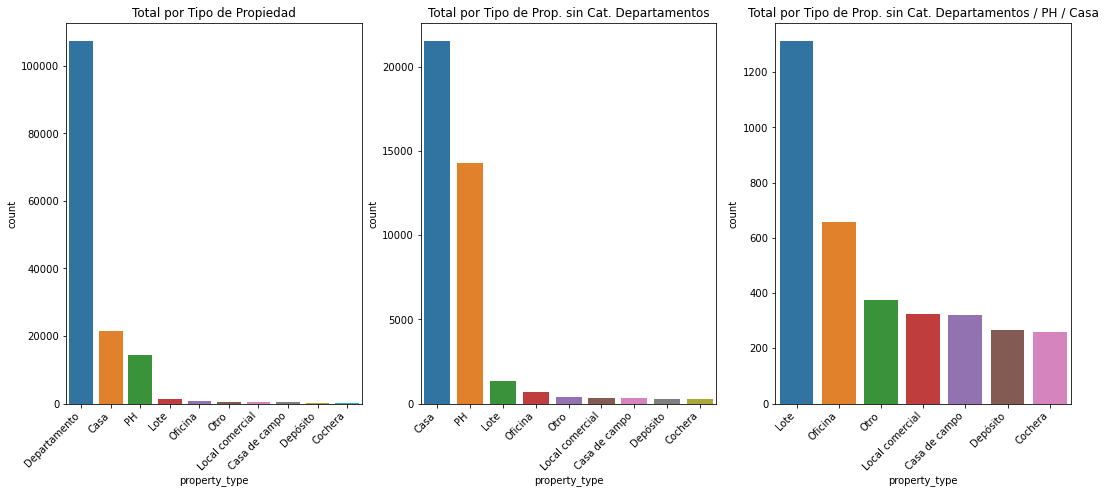

In [6]:
plt.figure(figsize=(9*2,7))
plt.subplot(1,3,1)
sns.countplot(x = 'property_type', data = data , order = data['property_type'].value_counts().index) 
plt.xticks(rotation = 45, ha = 'right')
plt.title('Total por Tipo de Propiedad')
plt.subplot(1,3,2) 
data1 = data[(data['property_type']!='Departamento')]
sns.countplot(x = 'property_type', data = data1 , order = data1['property_type'].value_counts().index) 
plt.xticks(rotation = 45, ha = 'right')
plt.title('Total por Tipo de Prop. sin Cat. Departamentos')
plt.subplot(1,3,3) 
data1 = data[(data['property_type']!='Departamento') & (data['property_type']!='PH') & (data['property_type']!='Casa')]
sns.countplot(x = 'property_type', data = data1 , order = data1['property_type'].value_counts().index) 
plt.xticks(rotation = 45, ha = 'right')
plt.title('Total por Tipo de Prop. sin Cat. Departamentos / PH / Casa')


Siendo la zona mas poblada de Argentina es de esperar que la mayor oferta este concentrada en los Departamentos, y como tercer lugar las Casas y PHs. Es muy bajo los ofrecimientos a los que se refiere en Lotes a Cocheras. Con la llegada del COVID, estas tendencias se estan modificando claramente, a favor de las zonas mas alejadas a Capital Federal, generando una fuerte suba de precios en los Lotes y Casas. Con la devaluación del dolar la construcción bajo su costo notariamente, a pesar de las correcciones de los precios del 2021. Este dataset termina en los comienzos del 2020 donde todavía no se estaban marcando las nuevas tendencias del mercado.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

<function matplotlib.pyplot.show(close=None, block=None)>

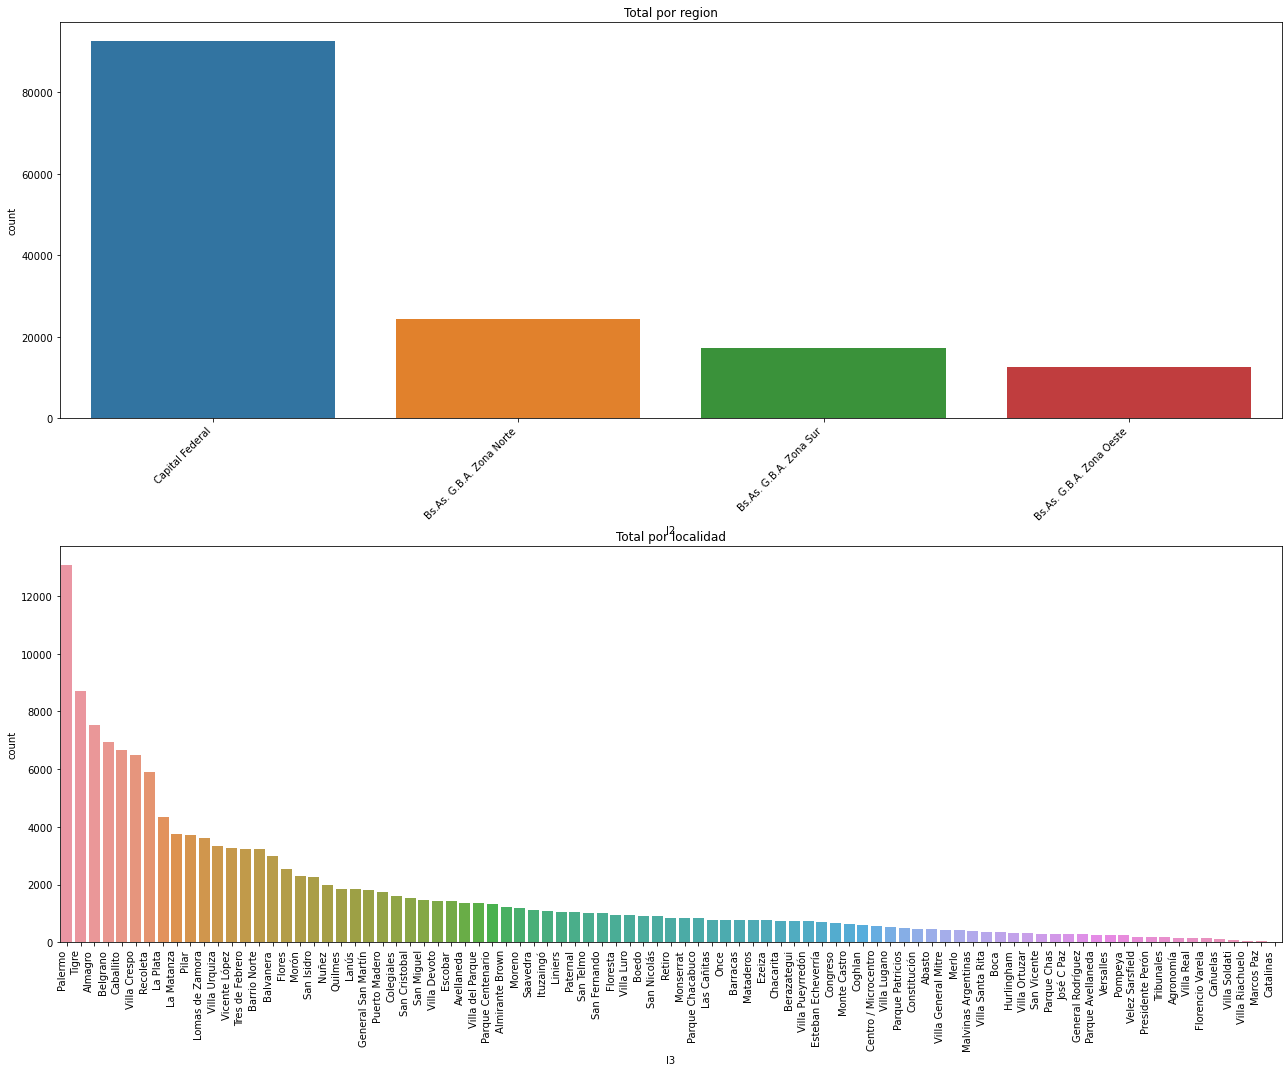

In [7]:
plt.figure(figsize=(9*2,15))
plt.subplot(2,1,1)
sns.countplot(x = "l2", data = data, order= data['l2'].value_counts().index)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Total por region') 
plt.subplot(2,1,2)
sns.countplot(x = "l3", data = data, order= data['l3'].value_counts().index) 
plt.xticks(rotation = 90, ha = 'right', fontsize=10)
plt.tight_layout()
plt.title('Total por localidad')
plt.show 

Es notable el número de ofertas en Palermo, pero hay que tomar en cuenta que es uno de los barrios más grandes de Capital Federal y de mayor moda comercial y crecimiento de construcciones de viviendas y oficinas. La Matanza y Pilar siempre han sido foco de la tendencia de las industrias y grandes oficinas para el alejamiento de los centros poblacionales. 

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [10]:
df1 = data[(data['property_type']=='Departamento') | (data['property_type']=='Casa') | (data['property_type']=='PH')]
df = df1[(df1['l2']=='Capital Federal')]

Luego el cambio en el dataset producido, se mantiene las 19 columnas, pero con 91485 filas. 

In [11]:
print(df.shape) 
print(df.columns)


(91485, 19)
Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [12]:
#Se borra los datos nullos
df = df.dropna(axis = 0)
#Se borra datos incosistente en el caso que la superficie total es menor a la superficia cubierta
df = df[(df['surface_covered']<=df['surface_total'])]
#Se borra las columnas que no tiene necesidad de analisis 
df.drop(['description'], axis=1, inplace=True)
df.drop(['title'], axis=1, inplace=True) 
df.drop(['currency'], axis=1, inplace=True)
df.drop(['operation_type'], axis=1, inplace=True)
df.drop(['l1'], axis=1, inplace=True)
df.drop(['lat'], axis=1, inplace=True)
df.drop(['lon'], axis=1, inplace=True)
df.drop(['start_date'], axis=1, inplace=True)
df.drop(['end_date'], axis=1, inplace=True)
df.drop(['created_on'], axis=1, inplace=True)
print('Columnas Limpias')
print(df.columns)
print(df.shape)

Columnas Limpias
Index(['l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'property_type'],
      dtype='object')
(76214, 9)


El dataset toma ahora la forma de 9 columnas y 76214 filas

**Outliers de surface_total**
Como se observa en el primer grafico la cantidad de outliers generan una distorción en los datos percibidos, por este motivo en cuando se filtra el 5% superior, podemos obtener mas claramente la media y los rangos de los cuartiles. La distribución de los datos en el segundo grafico se mantiene una cierta cantidad de outliers para mantener una cantidad de datos prudentes para el entrenamiento y testeo del modelo. Se claramente que el valor minimo se mantiene, pero el maximo cambia de 126 mil a 243m2. La media tambien sufre un cambio de 113 a 81m2.

 
Superficie Total
count     76214.000000
mean        113.243709
std        1019.958634
min          13.000000
25%          49.000000
50%          71.000000
75%         110.000000
max      126062.000000
Name: surface_total, dtype: float64
244.0
Con limpieza
0    140.0
1     70.0
2     45.0
3     85.0
5     56.0
Name: surface_total, dtype: float64
count    72387.000000
mean        81.589802
std         45.059364
min         13.000000
25%         48.000000
50%         68.000000
75%        101.000000
max        243.000000
Name: surface_total, dtype: float64


<AxesSubplot:ylabel='surface_total'>

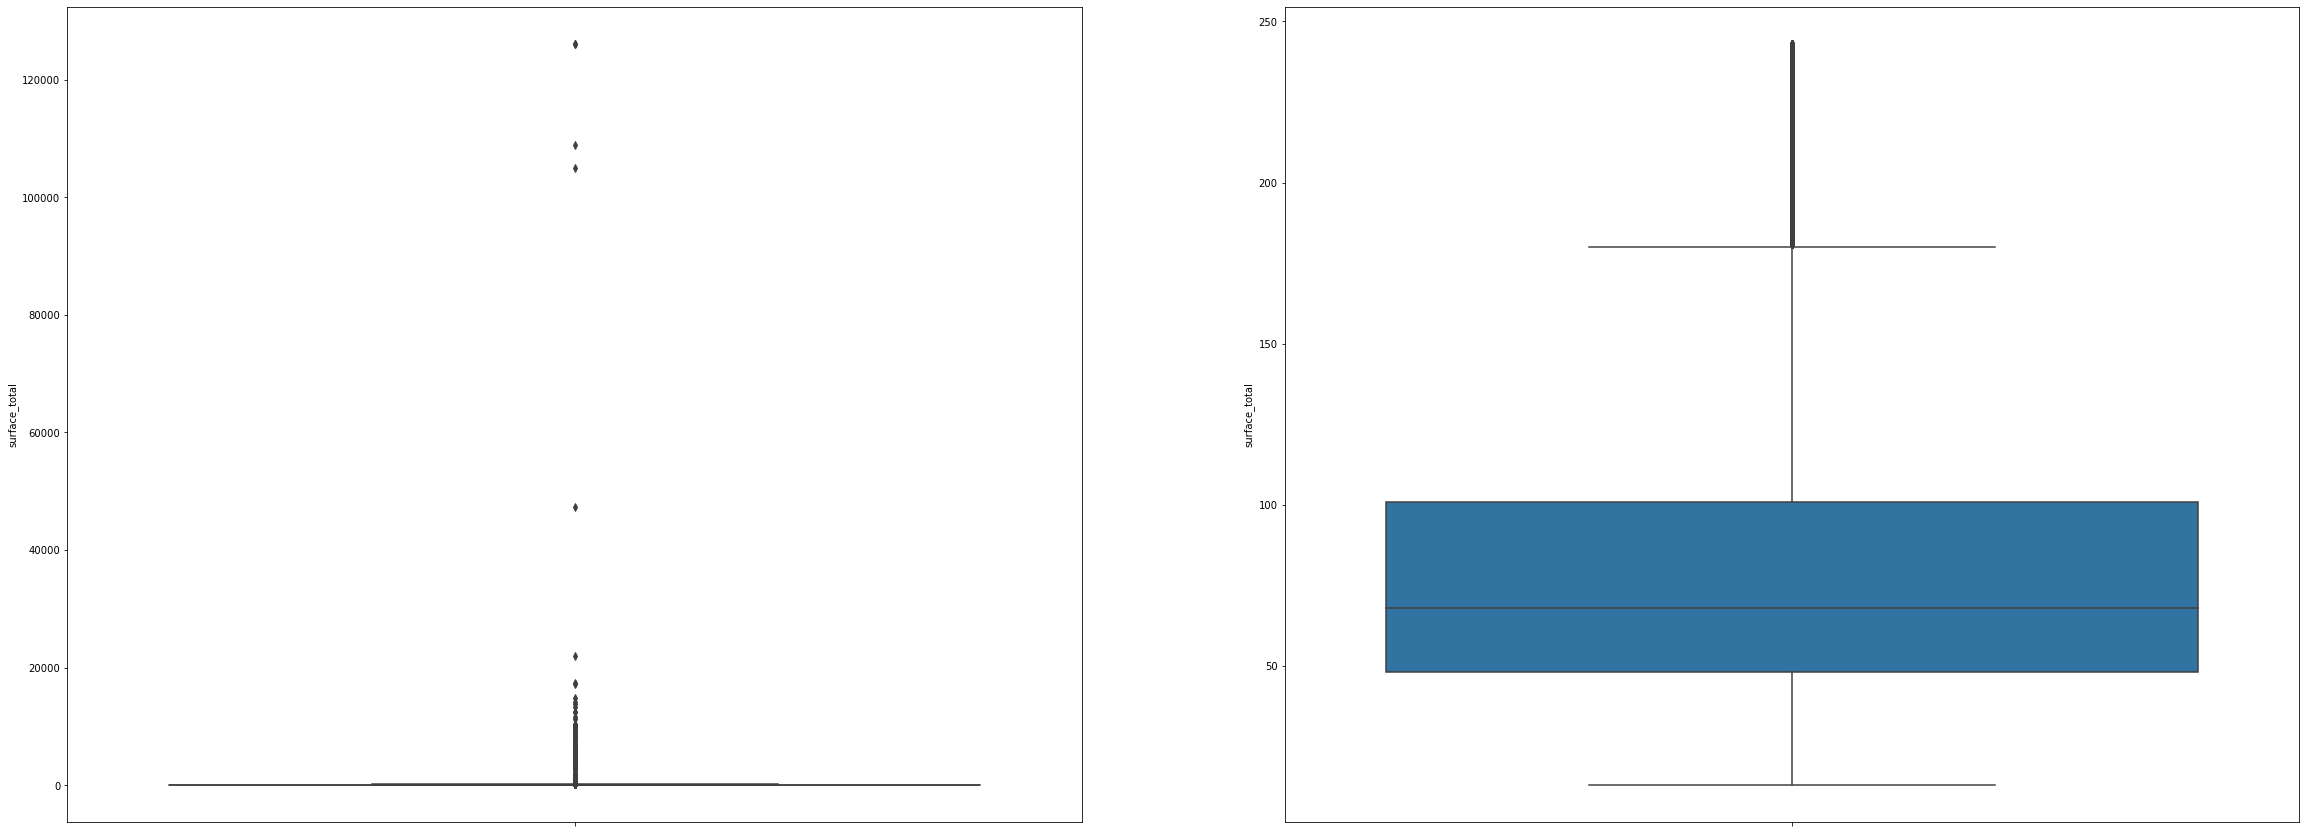

In [13]:
#Detección de Outliers 
plt.figure(figsize=(40,15))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="surface_total")
print(' ')
print('Superficie Total')
print(df['surface_total'].describe()) 
upperLimit_st = df['surface_total'].quantile(0.95) 
print(upperLimit_st)
df = df[(df['surface_total'] < upperLimit_st)]
print('Con limpieza')
print(df['surface_total'].head())
print(df['surface_total'].describe())
plt.subplot(1,2,2)
sns.boxplot(data=df, y="surface_total")

**Outliers de surface_covered**
Como se observa en el primer grafico la cantidad de outliers generan una distorción en los datos percibidos, por este motivo en cuando se filtra el 5% superior, podemos obtener mas claramente la media y los rangos de los cuartiles. La distribución de los datos en el segundo grafico se mantiene una cierta cantidad de outliers para mantener una cantidad de datos prudentes para el entrenamiento y testeo del modelo. Se claramente que el valor minimo se mantiene, pero el maximo cambia de 243 mil a 152m2. La media tambien sufre un cambio de 38 a 65m2.

 
Superficie Cubierta
count    72387.000000
mean        71.876994
std         38.935754
min          1.000000
25%         44.000000
50%         60.000000
75%         89.000000
max        243.000000
Name: surface_covered, dtype: float64
153.0
Con limpieza
0    140.0
1     58.0
2     45.0
3     50.0
5     56.0
Name: surface_covered, dtype: float64
count    68729.000000
mean        65.969663
std         29.654244
min          1.000000
25%         43.000000
50%         58.000000
75%         82.000000
max        152.000000
Name: surface_covered, dtype: float64


<AxesSubplot:ylabel='surface_covered'>

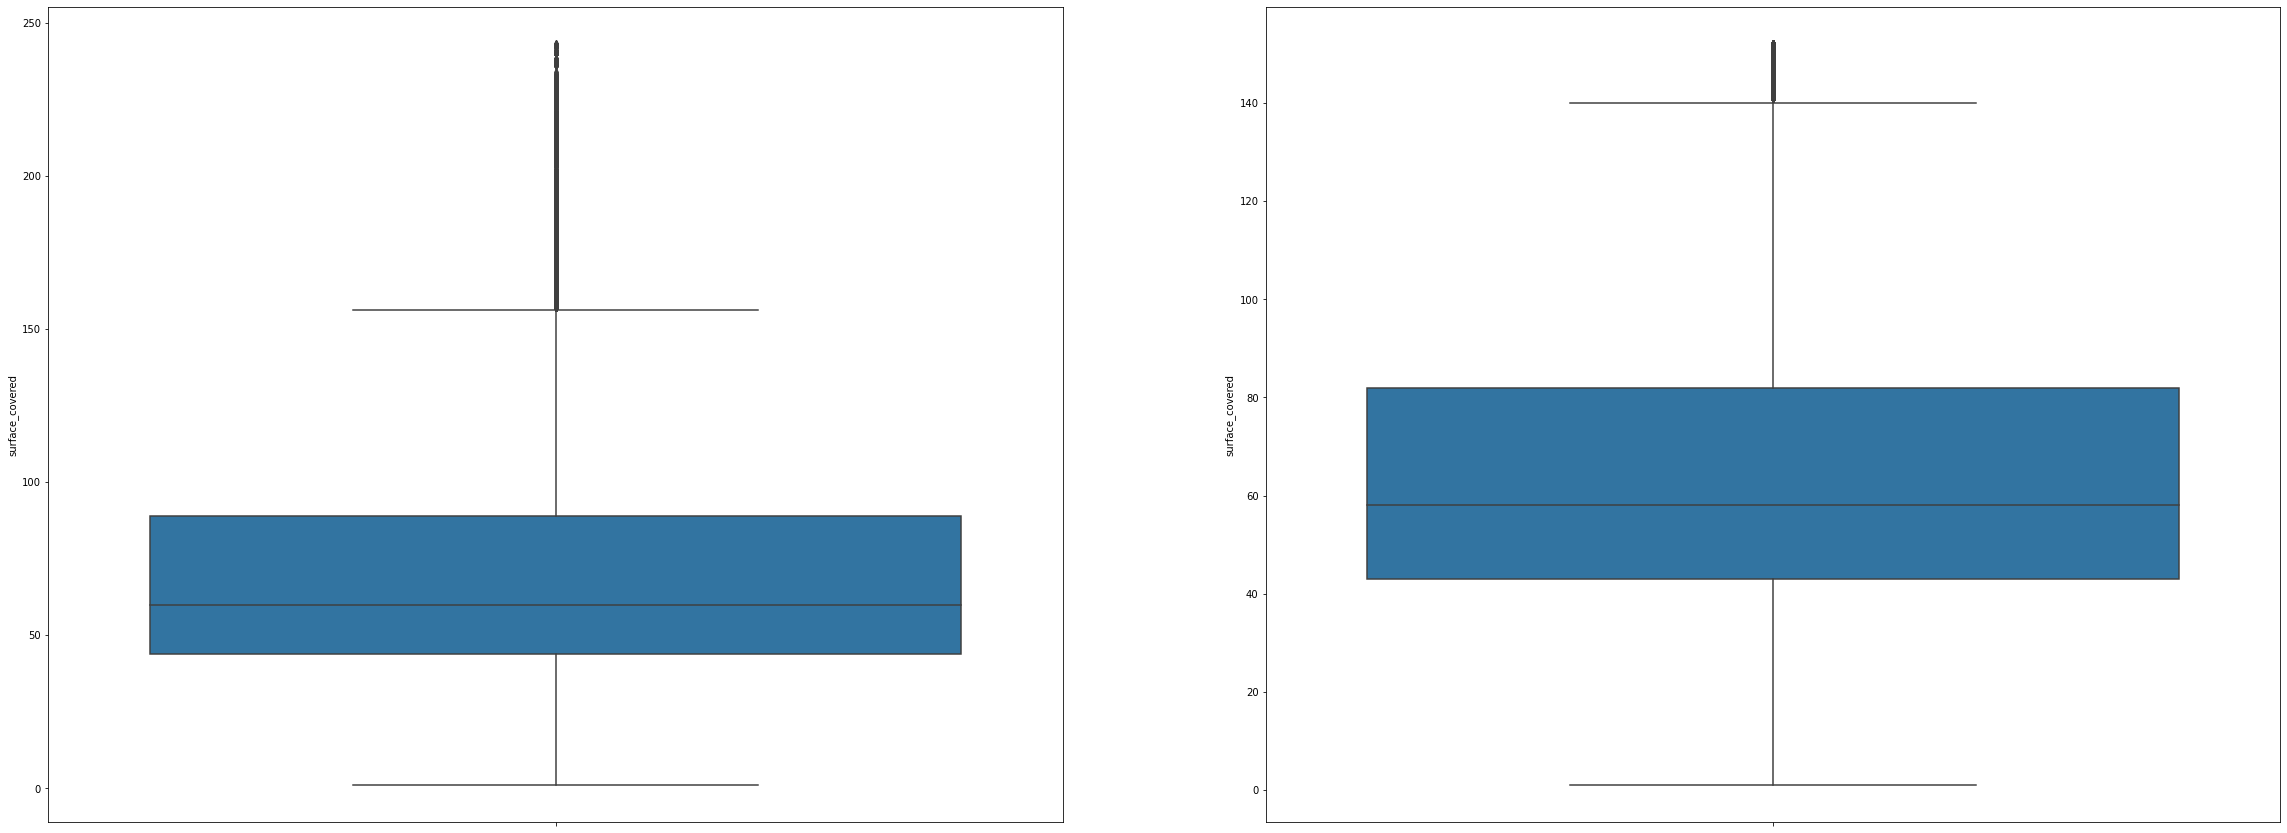

In [14]:
plt.figure(figsize=(40,15))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="surface_covered") 
print(' ')
print('Superficie Cubierta')
print(df['surface_covered'].describe()) 
upperLimit_sc = df['surface_covered'].quantile(0.95) 
print(upperLimit_sc)
print('Con limpieza')
df = df[(df['surface_covered'] < upperLimit_sc)]
print(df['surface_covered'].head())
print(df['surface_covered'].describe())
plt.subplot(1,2,2)
sns.boxplot(data=df, y="surface_covered")

**Outliers de price**
El precio sufre varios cambio con solo hacer la modificación del 5% en los margenes superiores. La distribución de los datos en el segundo grafico se mantiene una cierta cantidad de outliers para mantener una cantidad de datos prudentes para el entrenamiento y testeo del modelo. Se claramente que el valor minimo se mantiene, pero el maximo cambia de 3.2 x E7 a 428550 USD. La media tambien sufre un cambio de 2 x E5 a 179577 USD.

 
Precio
count    6.872900e+04
mean     2.004359e+05
std      1.763035e+05
min      7.500000e+03
25%      1.195000e+05
50%      1.660000e+05
75%      2.430000e+05
max      3.243423e+07
Name: price, dtype: float64
429000.0
Con limpieza
count     65274.000000
mean     179577.602445
std       82087.685475
min        7500.000000
25%      116500.000000
50%      160000.000000
75%      230000.000000
max      428550.000000
Name: price, dtype: float64


<AxesSubplot:ylabel='price'>

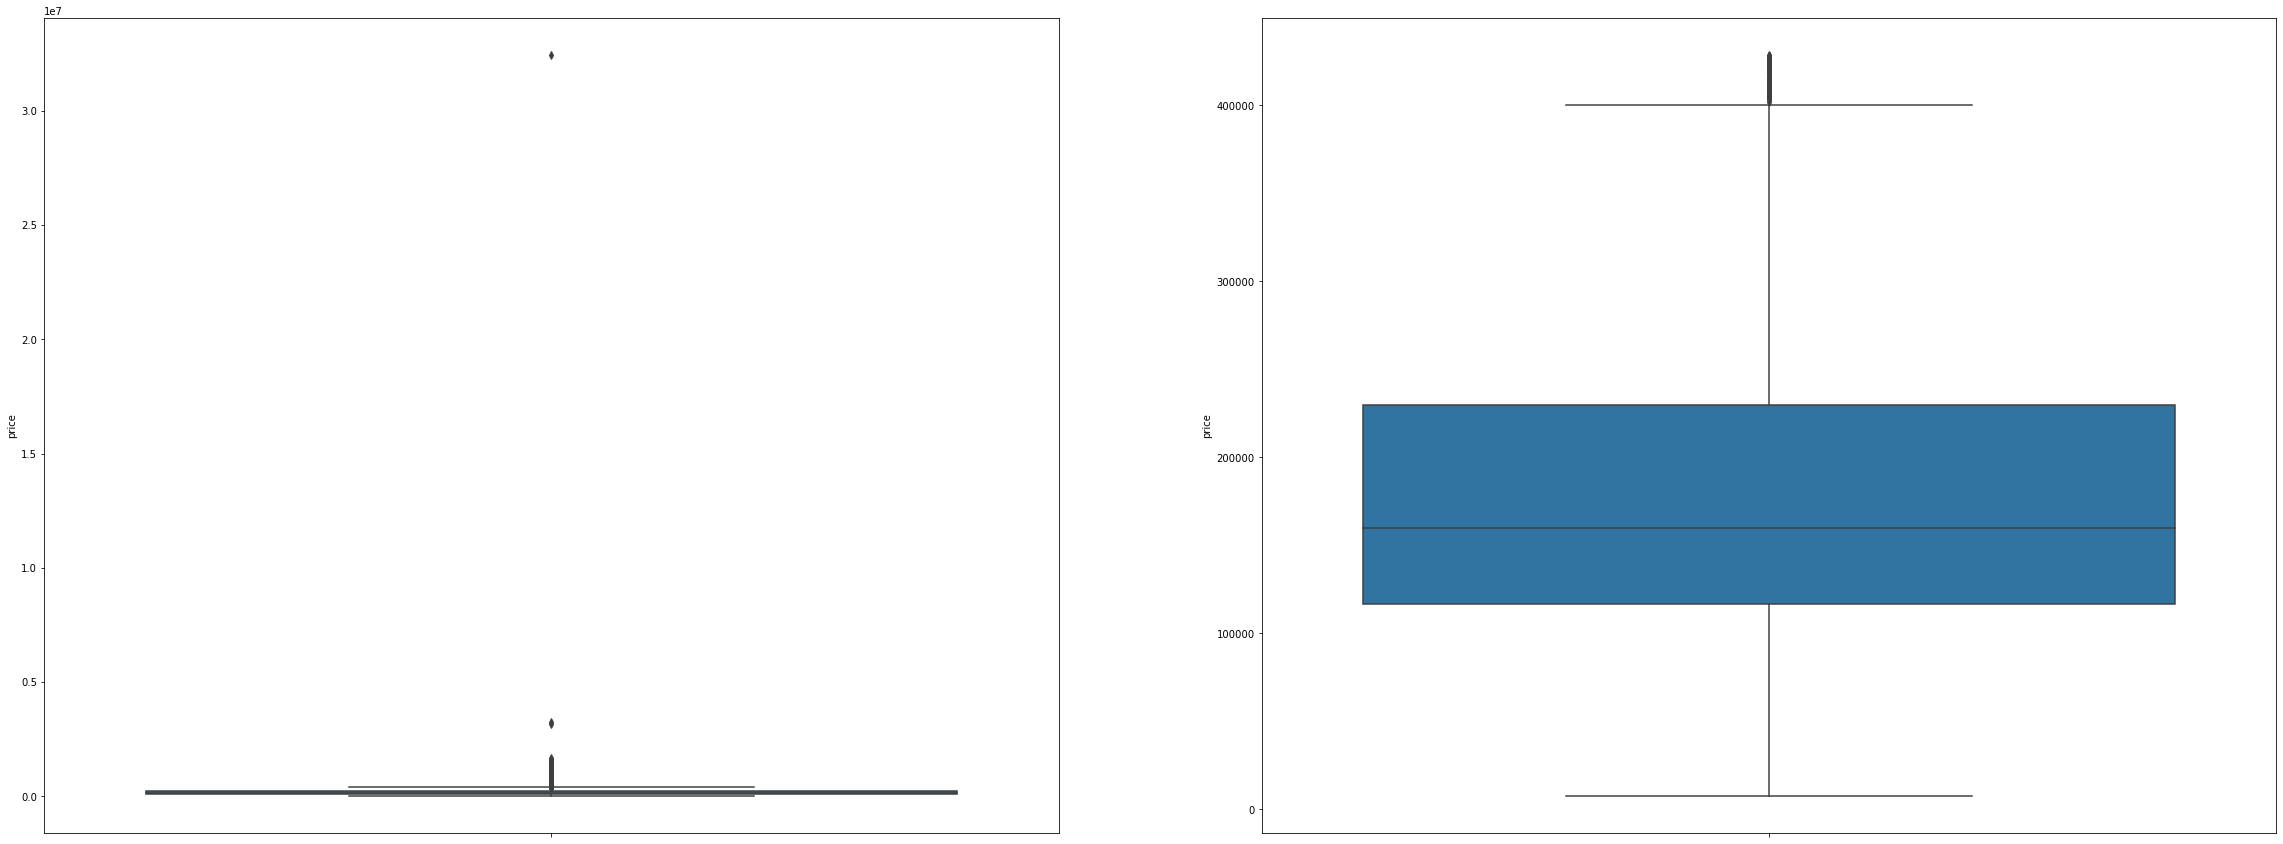

In [15]:
plt.figure(figsize=(40,15))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="price") 
print(' ')
print('Precio')
print(df['price'].describe()) 
upperLimit_price = df['price'].quantile(0.95) 
print(upperLimit_price)
df = df[(df['price'] < upperLimit_price)]
print('Con limpieza')
print(df['price'].describe())
plt.subplot(1,2,2)
sns.boxplot(data=df, y="price") 

**Outliers de rooms**
La cantidad de cuartos fue una variable mas dificil de limpiar, ya que su maxima es 21, con una gran porción de outliers. Para no dejar el dataset demasiado ajustado se limpio el 1% del margen superior. El minimo se mantiene en 1 cuarto. El maximo se reduce a 4 que es un estandar comun para ciertas propiedades de capital. Y la media sufre una minima modificación. 

Cuartos
count    65274.000000
mean         2.725159
std          1.010230
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         21.000000
Name: rooms, dtype: float64
5.0
Con limpieza
1    2.0
2    2.0
3    2.0
5    2.0
6    2.0
Name: rooms, dtype: float64
count    62954.000000
mean         2.631556
std          0.888713
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: rooms, dtype: float64


<AxesSubplot:ylabel='rooms'>

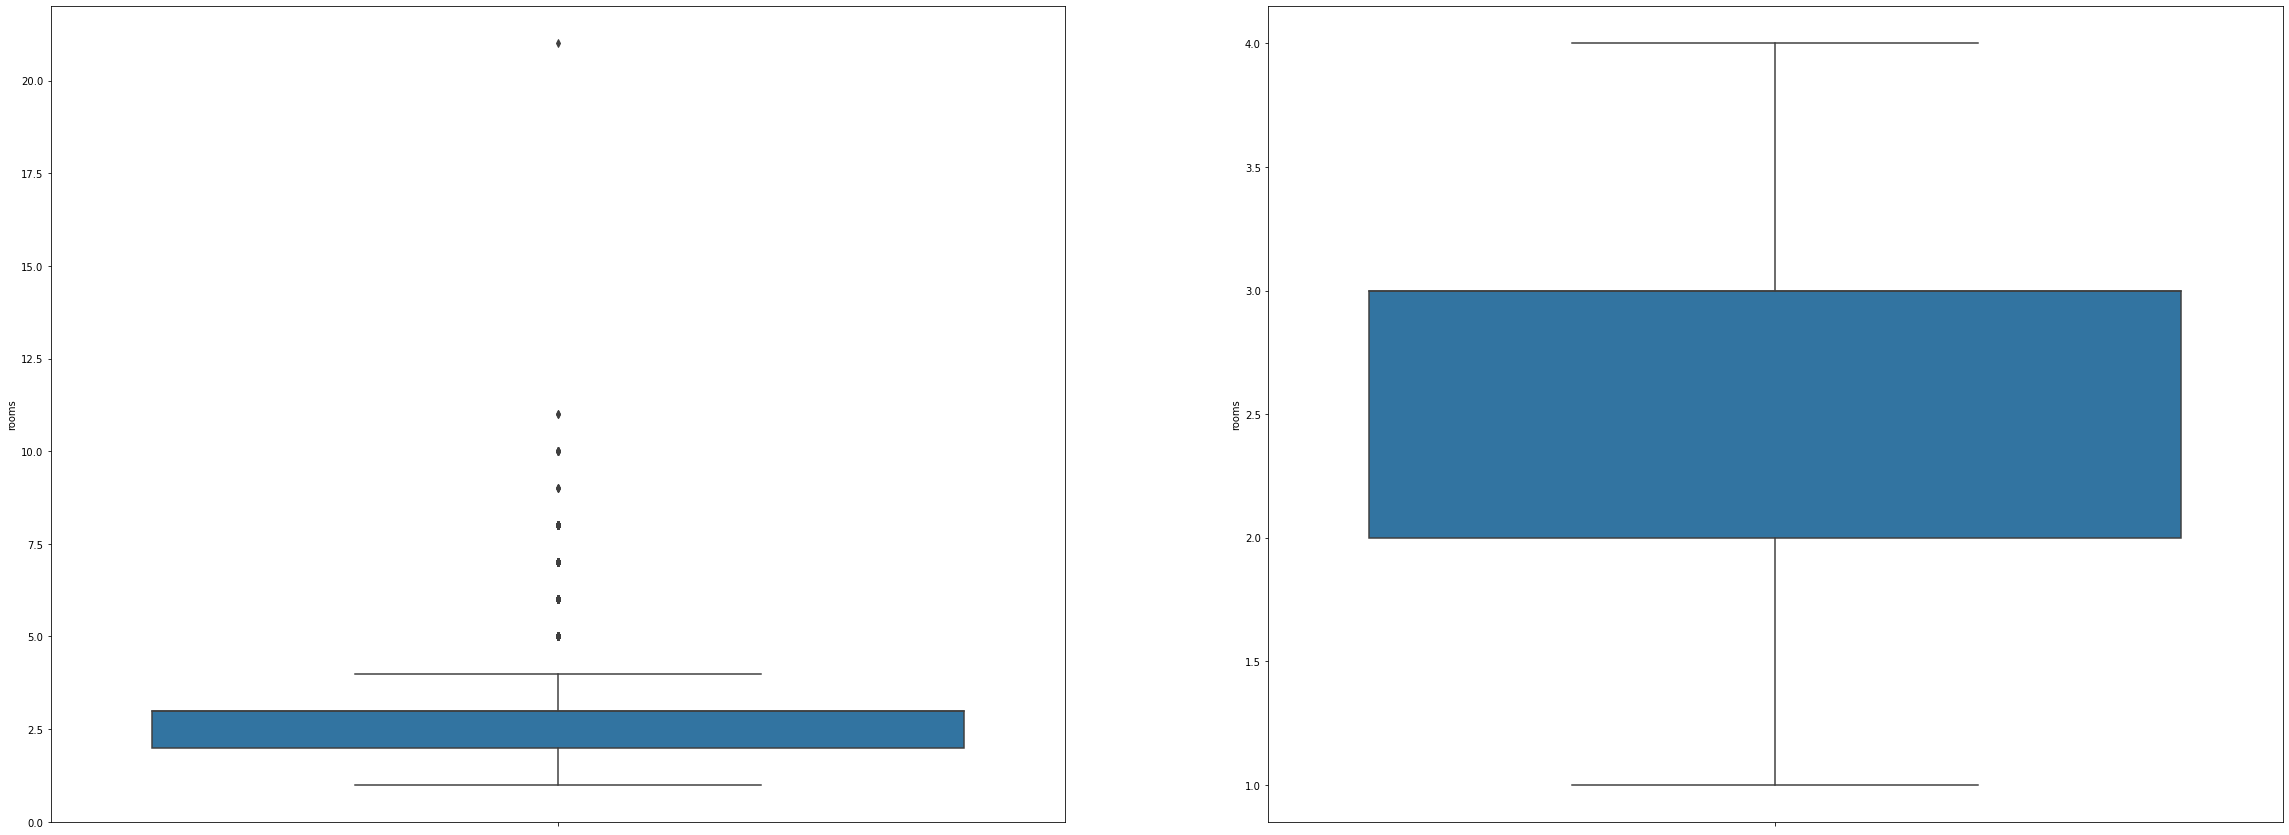

In [16]:
plt.figure(figsize=(40,15))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="rooms") 
print('Cuartos')
print(df['rooms'].describe()) 
upperLimit_rooms = df['rooms'].quantile(0.99) 
print(upperLimit_rooms)
df = df[(df['rooms'] < upperLimit_rooms)]
print('Con limpieza')
print(df['rooms'].head())
print(df['rooms'].describe())
plt.subplot(1,2,2)
sns.boxplot(data=df, y="rooms") 

**Outliers de bedrooms**
Los dormitorios también resulta una variable complicada en su limpieza, ya que tiene unos 15 dormitorios como maximo. Tomando en cuenta el tamaño del dataset puse como limitante el maximo de 10. Igualmente la maxima se reduce a 5 que sigue siendo un numero mas acorde a los estadares de capital federal. La media tan poco sufre modificaciones significativas.

 
Cuartos de Dormir
count    62954.000000
mean         1.712091
std          0.761410
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         15.000000
Name: bedrooms, dtype: float64
Con limpieza
count    62952.000000
mean         1.711733
std          0.758675
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: bedrooms, dtype: float64


<AxesSubplot:ylabel='bedrooms'>

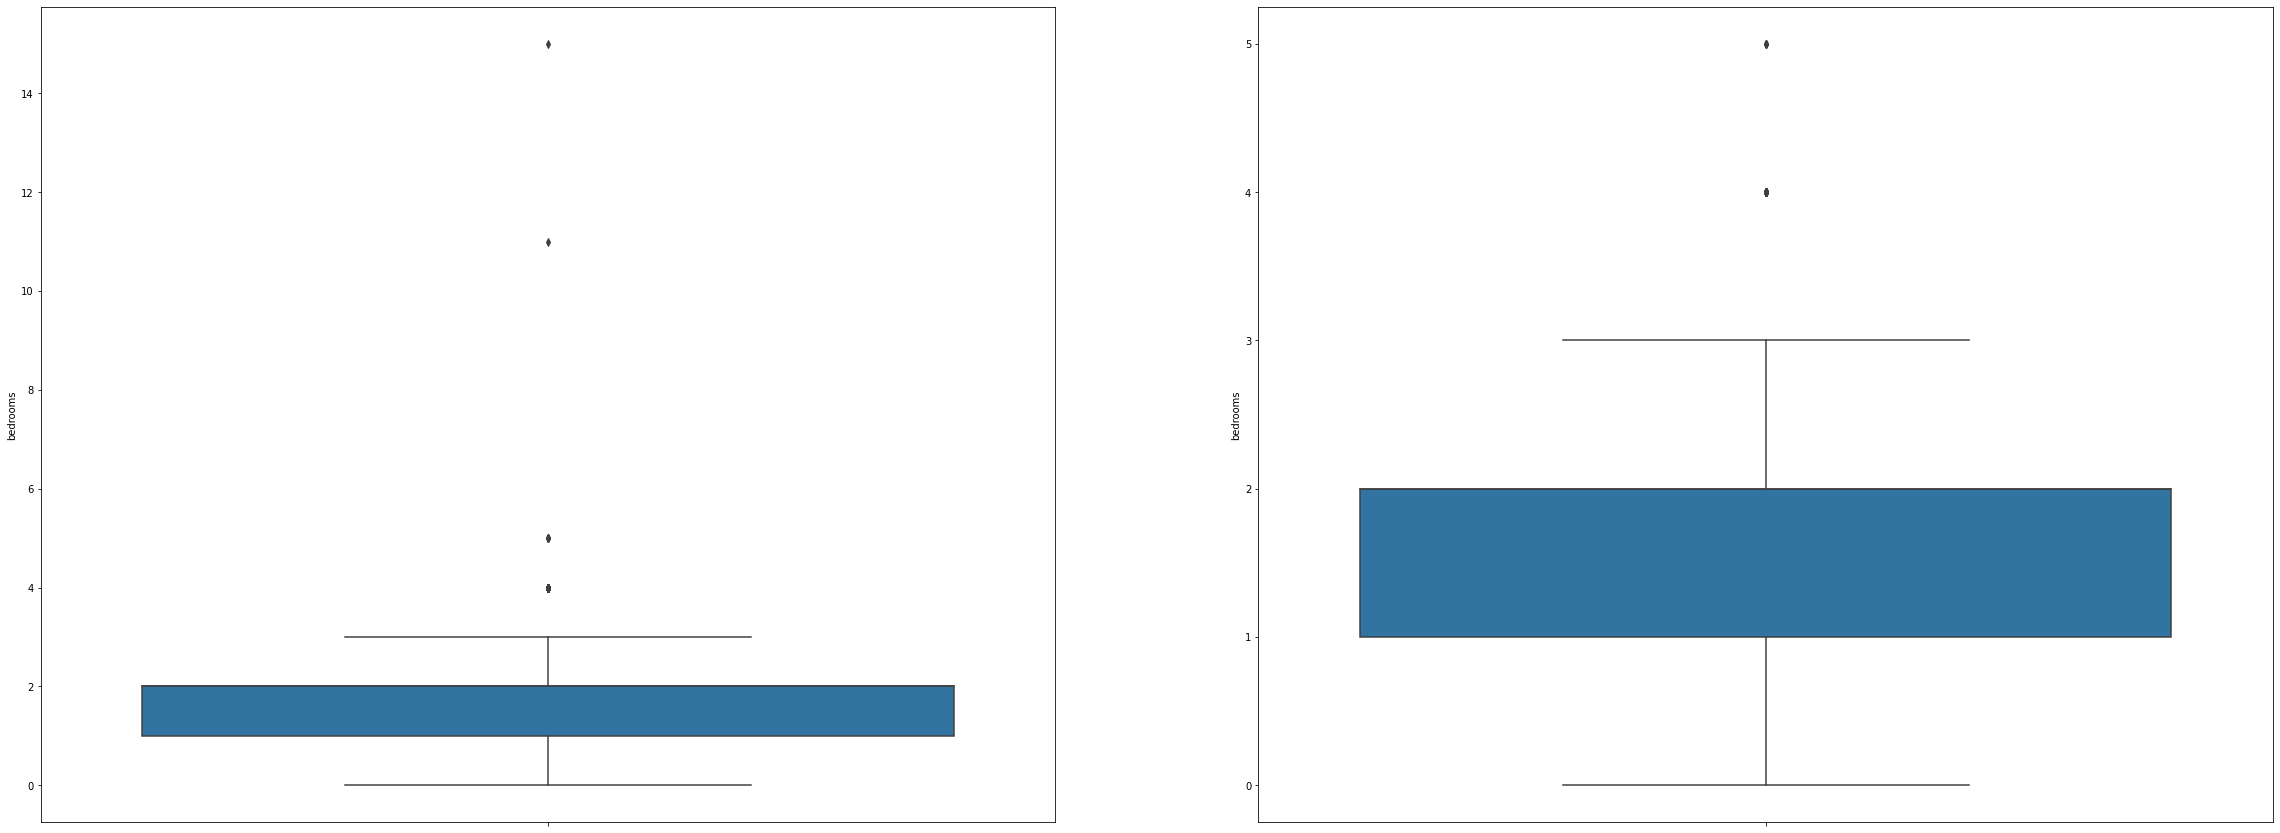

In [17]:
print(' ')
print('Cuartos de Dormir')
print(df['bedrooms'].describe())
plt.figure(figsize=(40,15))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="bedrooms") 
#lowerLimit_bedrooms = df['bedrooms'].quantile(0.05)
#upperLimit_bedrooms = df['bedrooms'].quantile(0.95)
#print(lowerLimit_bedrooms)
#print(upperLimit_bedrooms)
print('Con limpieza')
df = df[(df['bedrooms'] < 10)]
print(df['bedrooms'].describe()) 
plt.subplot(1,2,2)
sns.boxplot(data=df, y="bedrooms")

**Outliers de bathrooms**
Los baños también resulta una variable complicada en su limpieza, ya que tiene unos 14 dormitorios como maximo. Tomando en cuenta el tamaño del dataset puse como limitante el maximo de 10. Igualmente la maxima se reduce a 5 que sigue siendo un numero mas razonable para grandes propiedades en los estadares de capital federal. La media tan poco sufre modificaciones significativas.

 
Baños
count    62952.000000
mean         1.311158
std          0.565892
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: bathrooms, dtype: float64
Con limpieza
count    62943.000000
mean         1.309772
std          0.553744
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: bathrooms, dtype: float64


<AxesSubplot:ylabel='bathrooms'>

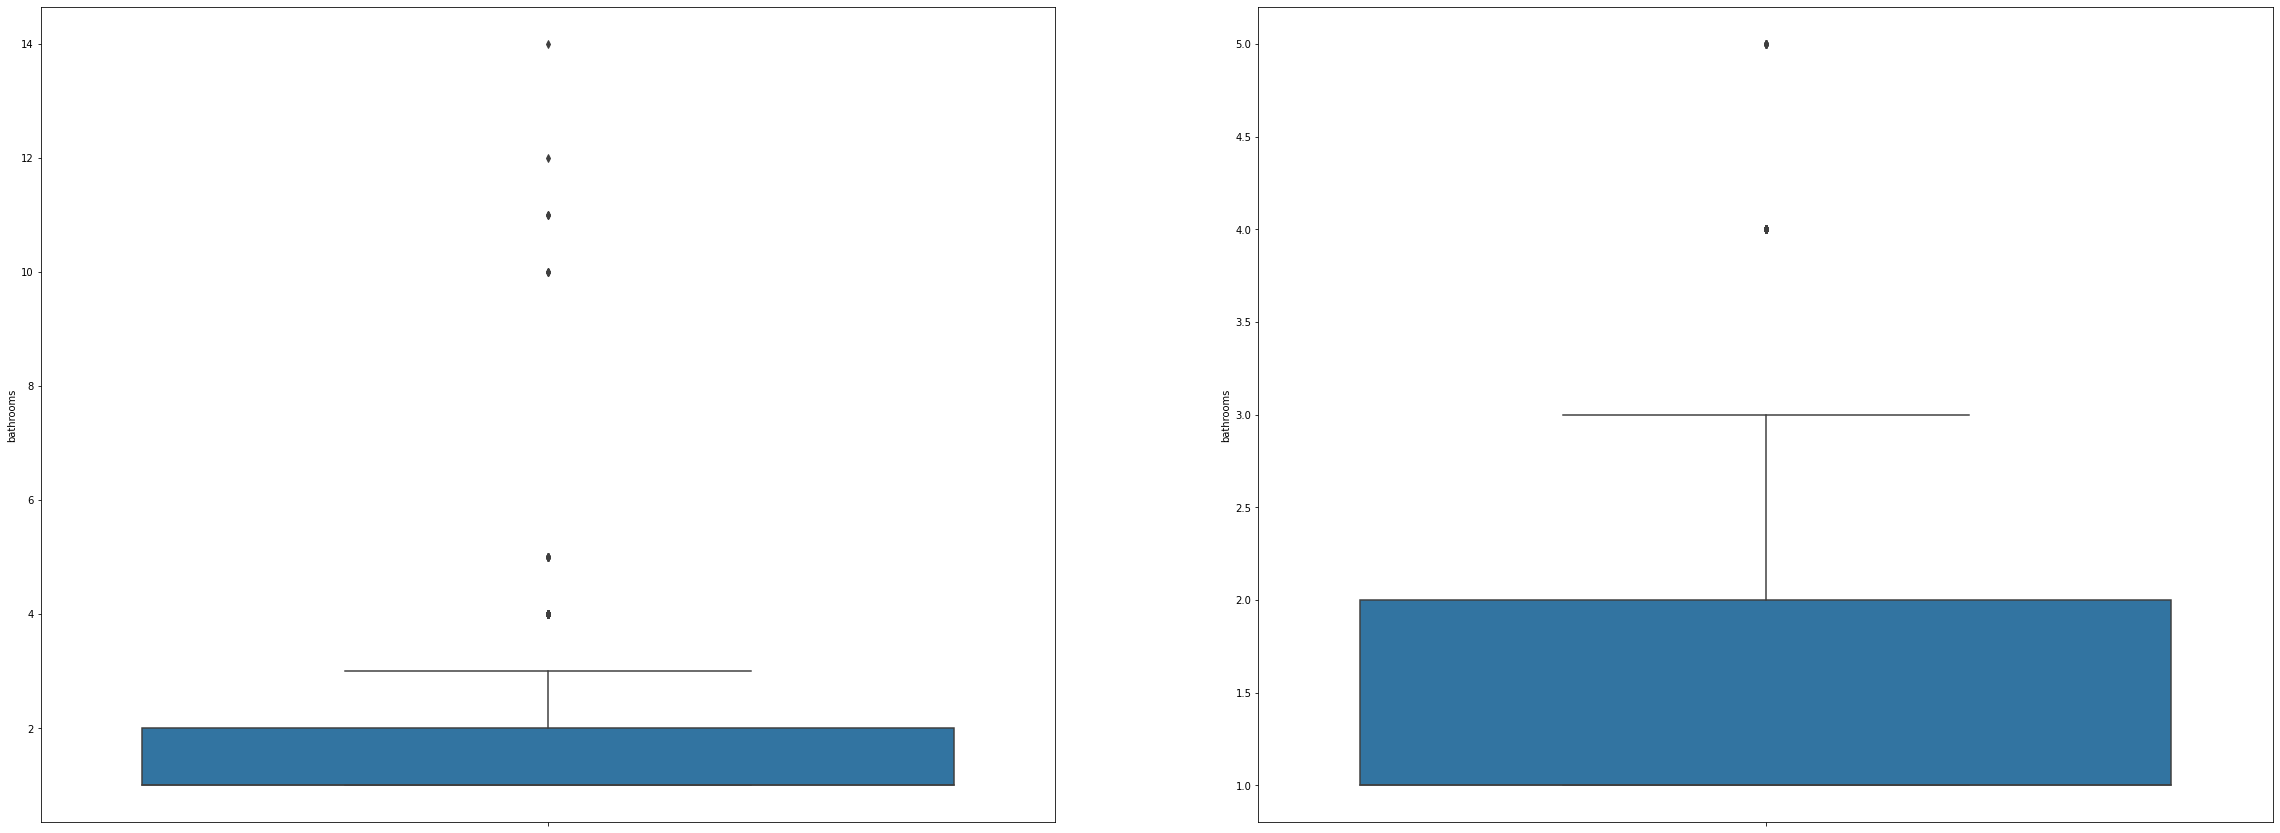

In [18]:
plt.figure(figsize=(40,15))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="bathrooms") 
print(' ')
print('Baños')
print(df['bathrooms'].describe())

df = df[(df['bathrooms'] < 10)]
print('Con limpieza')
print(df['bathrooms'].describe())
plt.subplot(1,2,2)
sns.boxplot(data=df, y="bathrooms")  

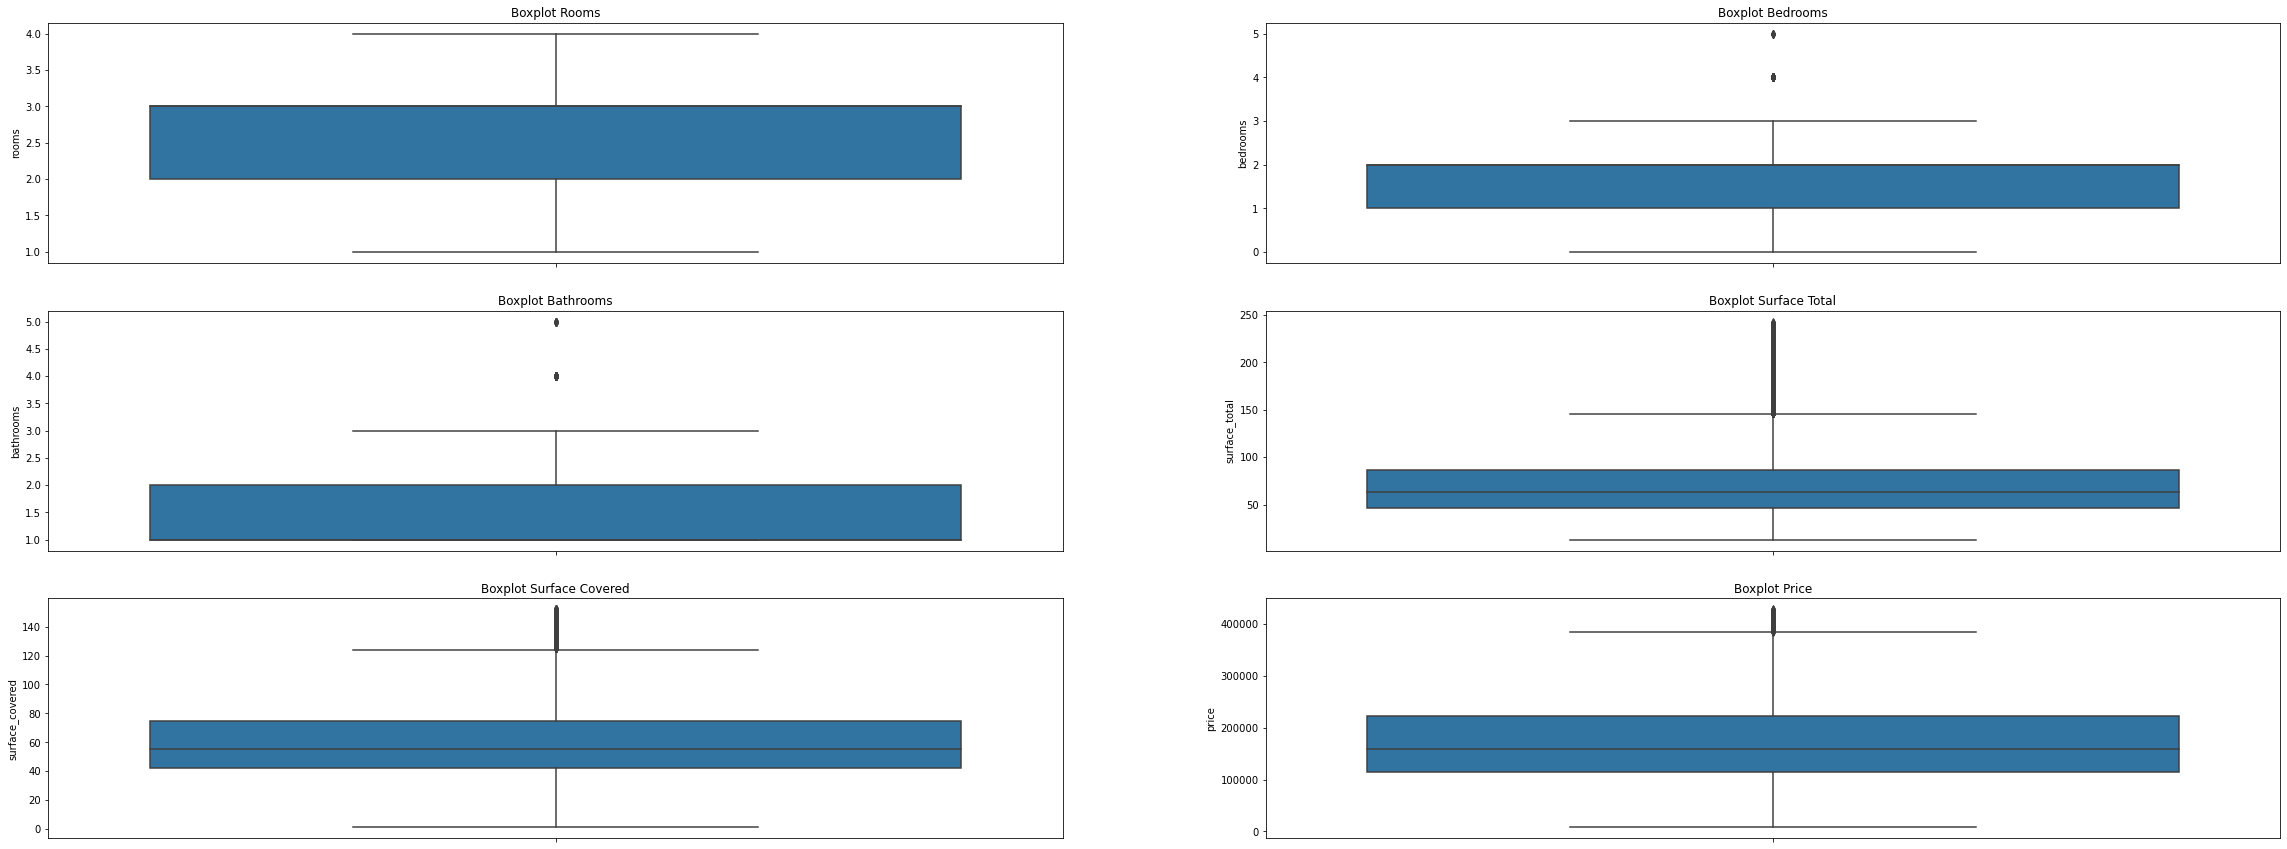

In [23]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
#Punto 1 y 2
plt.figure(figsize=(40,15))
plt.subplot(3,2,1)
sns.boxplot(data=df, y="rooms") 
plt.xticks(rotation = 45, ha = 'right')
plt.title('Boxplot Rooms')

plt.subplot(3,2,2)
sns.boxplot(data=df, y="bedrooms") 
plt.xticks(rotation = 45, ha = 'right')
plt.title('Boxplot Bedrooms')

plt.subplot(3,2,3)
sns.boxplot(data=df, y="bathrooms") 
plt.xticks(rotation = 45, ha = 'right')
plt.title('Boxplot Bathrooms')

plt.subplot(3,2,4)
sns.boxplot(data=df, y="surface_total") 
plt.xticks(rotation = 45, ha = 'right')
plt.title('Boxplot Surface Total')

plt.subplot(3,2,5)
sns.boxplot(data=df, y="surface_covered") 
plt.xticks(rotation = 45, ha = 'right')
plt.title('Boxplot Surface Covered')

plt.subplot(3,2,6)
sns.boxplot(data=df, y="price") 
plt.xticks(rotation = 45, ha = 'right')
plt.title('Boxplot Price')
plt.show()

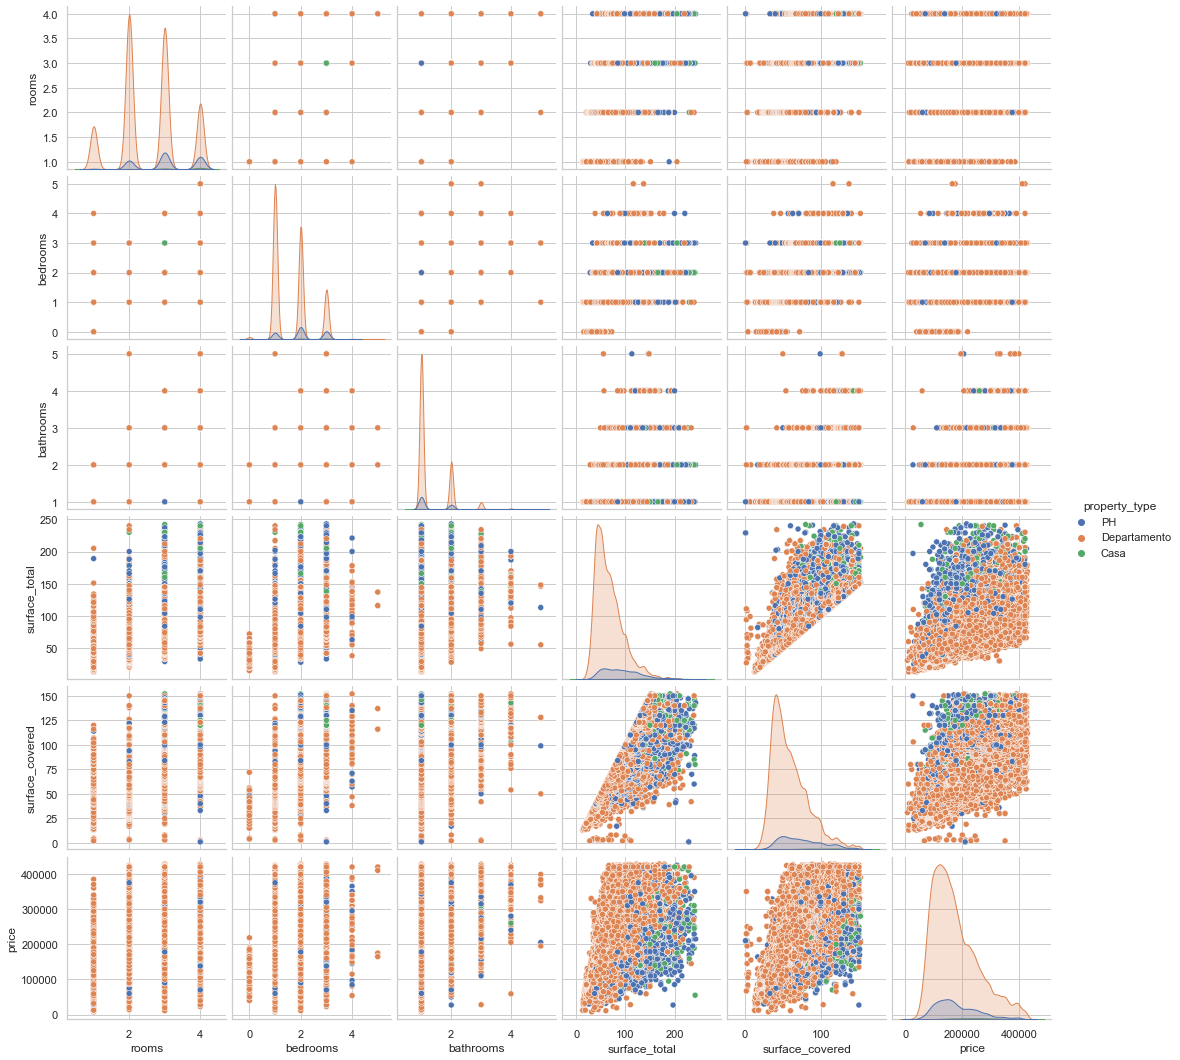

In [75]:
sns.pairplot(df, hue='property_type')

En lo que se observa en las correlaciones respecto al precio y sus features, hay que dividir los tipos de propiedad para poder determinar mejor las correlaciones positivas que hay. En lo que respecta a los Departamentos hay una correlación más fuerte con superficie total y superficie cubierta; la correlación positiva disminuye en lo que se refiere a cuartos, dormitorios y baños, siendo igualmente mas significativa que en el caso de Casas y PHs. Estos dos últimos las correlaciones positivas son mas debiles entre el target y features, pero en el modelo no se esta tomando en cuenta las correlaciones entre lo que son las geolocalizaciones y la calidad / antiguedad de las propiedades. 

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [19]:
df_dep = df[(df['property_type']=='Departamento')]
df_casa = df[(df['property_type']=='Casa')]
df_ph = df[(df['property_type']=='PH')]

Text(0.5, 1.0, 'Correlaciones generales')

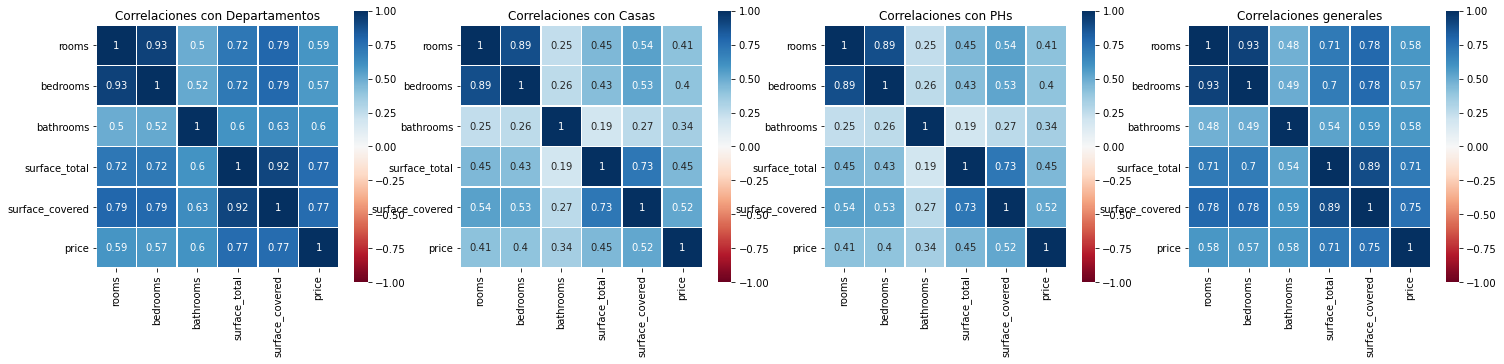

In [20]:
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.heatmap(df_dep.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True, linewidth=.7, square = True)
plt.title('Correlaciones con Departamentos')
plt.subplot(1,4,2)
sns.heatmap(df_casa.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True, linewidth=.7, square = True)
plt.title('Correlaciones con Casas')
plt.subplot(1,4,3)
sns.heatmap(df_casa.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True, linewidth=.7, square = True)
plt.title('Correlaciones con PHs')
plt.subplot(1,4,4)
sns.heatmap(df.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True, linewidth=.7, square = True)
plt.title('Correlaciones generales')

Al separar las correlaciones en tipo de propiedad permite ver claramente, en donde estas las correlaciones positivas para ser mejor aprovechadas en la construcción del ML. Cabe aclarar que en el caso de departamentos las correlaciones positivas de superficie total y superficie cubierta son mas fuertes que en el caso de Casas y PHs. Por este motivo, en la hora de definir los features escojo la totalidad para poder acercarme a predicciones mas reales para cada tipo de propiedad y barrio. 

Text(0.5, 1.0, 'Correlaciones con Precios y Superficia Cubierta para PH')

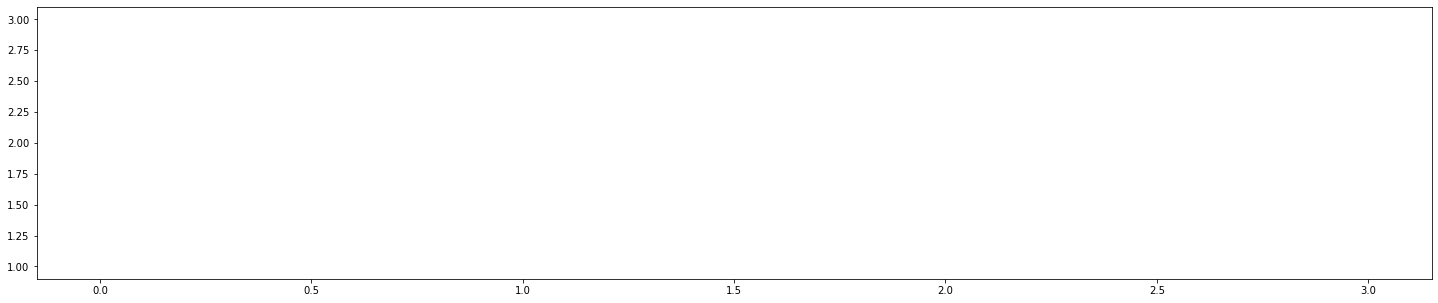

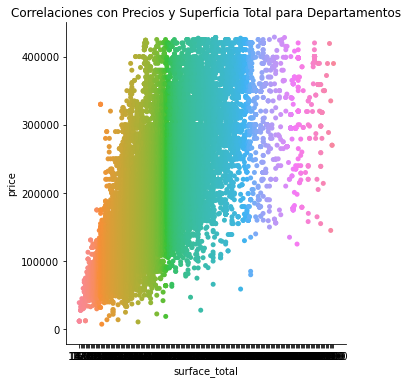

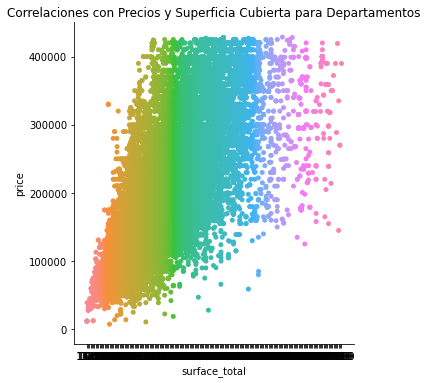

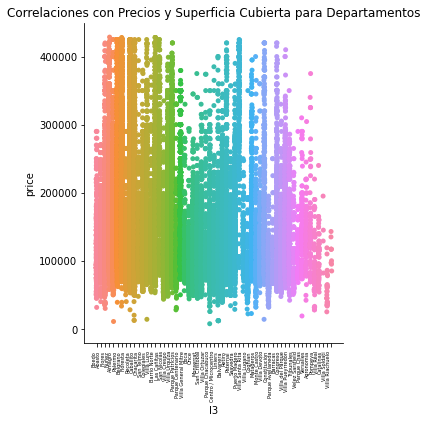

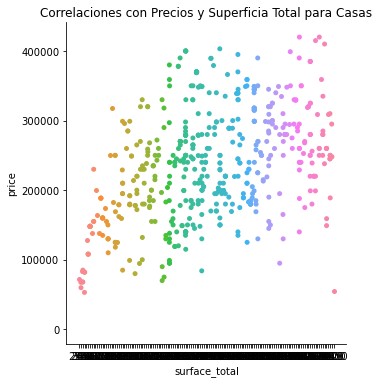

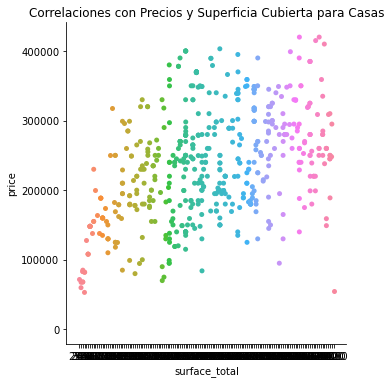

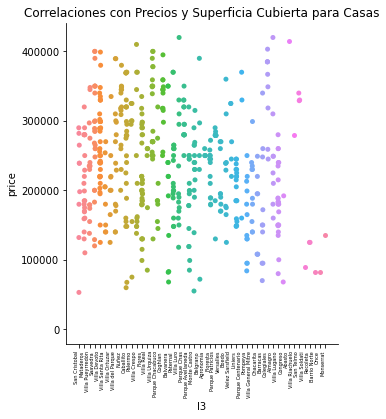

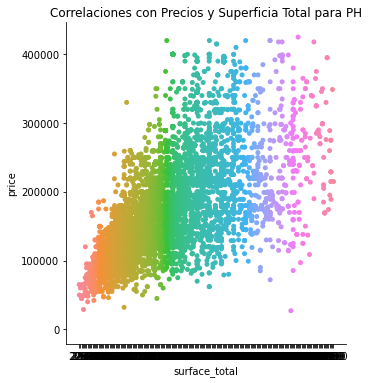

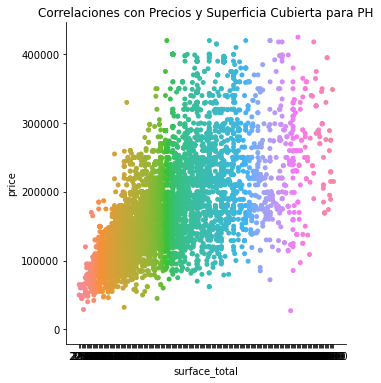

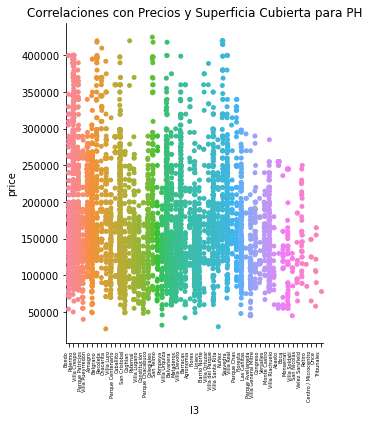

In [21]:
plt.figure(figsize=(25,5))
plt.plot(3,3,1)
sns.catplot(data=df_dep,x="surface_total", y="price")
plt.title('Correlaciones con Precios y Superficia Total para Departamentos')
plt.plot(3,3,2)
sns.catplot(data=df_dep,x="surface_total", y="price")
plt.title('Correlaciones con Precios y Superficia Cubierta para Departamentos')
plt.plot(3,3,3)
sns.catplot(data=df_dep,x="l3", y="price")
plt.xticks(rotation = 90, ha = 'right', fontsize=5)
plt.title('Correlaciones con Precios y Superficia Cubierta para Departamentos')
plt.plot(3,3,4)
sns.catplot(data=df_casa,x="surface_total", y="price")
plt.title('Correlaciones con Precios y Superficia Total para Casas')
plt.plot(3,3,5)
sns.catplot(data=df_casa,x="surface_total", y="price")
plt.title('Correlaciones con Precios y Superficia Cubierta para Casas')
plt.plot(3,3,6)
sns.catplot(data=df_casa,x="l3", y="price")
plt.xticks(rotation = 90, ha = 'right', fontsize=5)
plt.title('Correlaciones con Precios y Superficia Cubierta para Casas')
plt.plot(3,3,7)
sns.catplot(data=df_ph,x="surface_total", y="price")
plt.title('Correlaciones con Precios y Superficia Total para PH')
plt.plot(3,3,8)
sns.catplot(data=df_ph,x="surface_total", y="price")
plt.title('Correlaciones con Precios y Superficia Cubierta para PH')
plt.plot(3,3,9)
sns.catplot(data=df_ph,x="l3", y="price")
plt.xticks(rotation = 90, ha = 'right', fontsize=5)
plt.title('Correlaciones con Precios y Superficia Cubierta para PH')

Respecto a estos gráficos, quería seguir recalcando la relación de una correlación positiva de los precios con la superficie total y superficie cubierta. Igualmente un elemento importante, cuando utilizamos l3 en la correlación con los precios, vemos que estos cambian fuertemente según la localidad que esté el precio varía, independientemente el tipo de propiedad.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [22]:
# Para saber el barrio mas caro o mas barato de Buenos Aires debemos incluir una columna que sería el precio del metro cuadrado de cada barrio: surface_total/price
df_d = df_dep.copy(deep=True)
df_d['price_m']= df_d['price']/df_d['surface_total']
print(df_d.head()) 
df_c = df_casa.copy(deep=True)
df_c['price_m']= df_c['price']/df_c['surface_total']
print(df_c.head())
df_p = df_ph.copy(deep=True)
df_p['price_m']= df_p['price']/df_p['surface_total']
print(df_p.head())

                 l2      l3  rooms  bedrooms  bathrooms  surface_total  \
11  Capital Federal   Boedo    2.0       1.0        1.0           68.0   
12  Capital Federal   Boedo    2.0       1.0        1.0           50.0   
20  Capital Federal  Abasto    2.0       1.0        1.0           31.0   
21  Capital Federal  Abasto    1.0       1.0        1.0           22.0   
22  Capital Federal  Flores    2.0       1.0        1.0           45.0   

    surface_covered     price property_type      price_m  
11             59.0  149000.0  Departamento  2191.176471  
12             44.0  115000.0  Departamento  2300.000000  
20             31.0   75000.0  Departamento  2419.354839  
21             22.0   48000.0  Departamento  2181.818182  
22             45.0   95000.0  Departamento  2111.111111  
                   l2                l3  rooms  bedrooms  bathrooms  \
336   Capital Federal     San Cristobal    3.0       1.0        2.0   
384   Capital Federal         Mataderos    3.0       2.0   

In [23]:
print("Total de datos")
print(df.shape)

Total de datos
(62943, 9)


Con todos los datos del dataset limpiados me quedan 9 columnas y 62943 filas.

In [24]:
print('Departamento')
print(df_d['price_m'].describe())
print(' ')
print('Casa')
print(df_c['price_m'].describe())
print(' ')
print('PH')
print(df_p['price_m'].describe())

Departamento
count    55479.000000
mean      2694.946684
std        749.709385
min        180.000000
25%       2202.127660
50%       2605.263158
75%       3095.238095
max      11000.000000
Name: price_m, dtype: float64
 
Casa
count     538.000000
mean     1767.621190
std       616.298877
min       227.272727
25%      1305.659204
50%      1724.137931
75%      2142.857143
max      4083.333333
Name: price_m, dtype: float64
 
PH
count    6926.000000
mean     2043.636786
std       642.682874
min       137.055838
25%      1585.171251
50%      2029.967777
75%      2479.531250
max      5322.580645
Name: price_m, dtype: float64


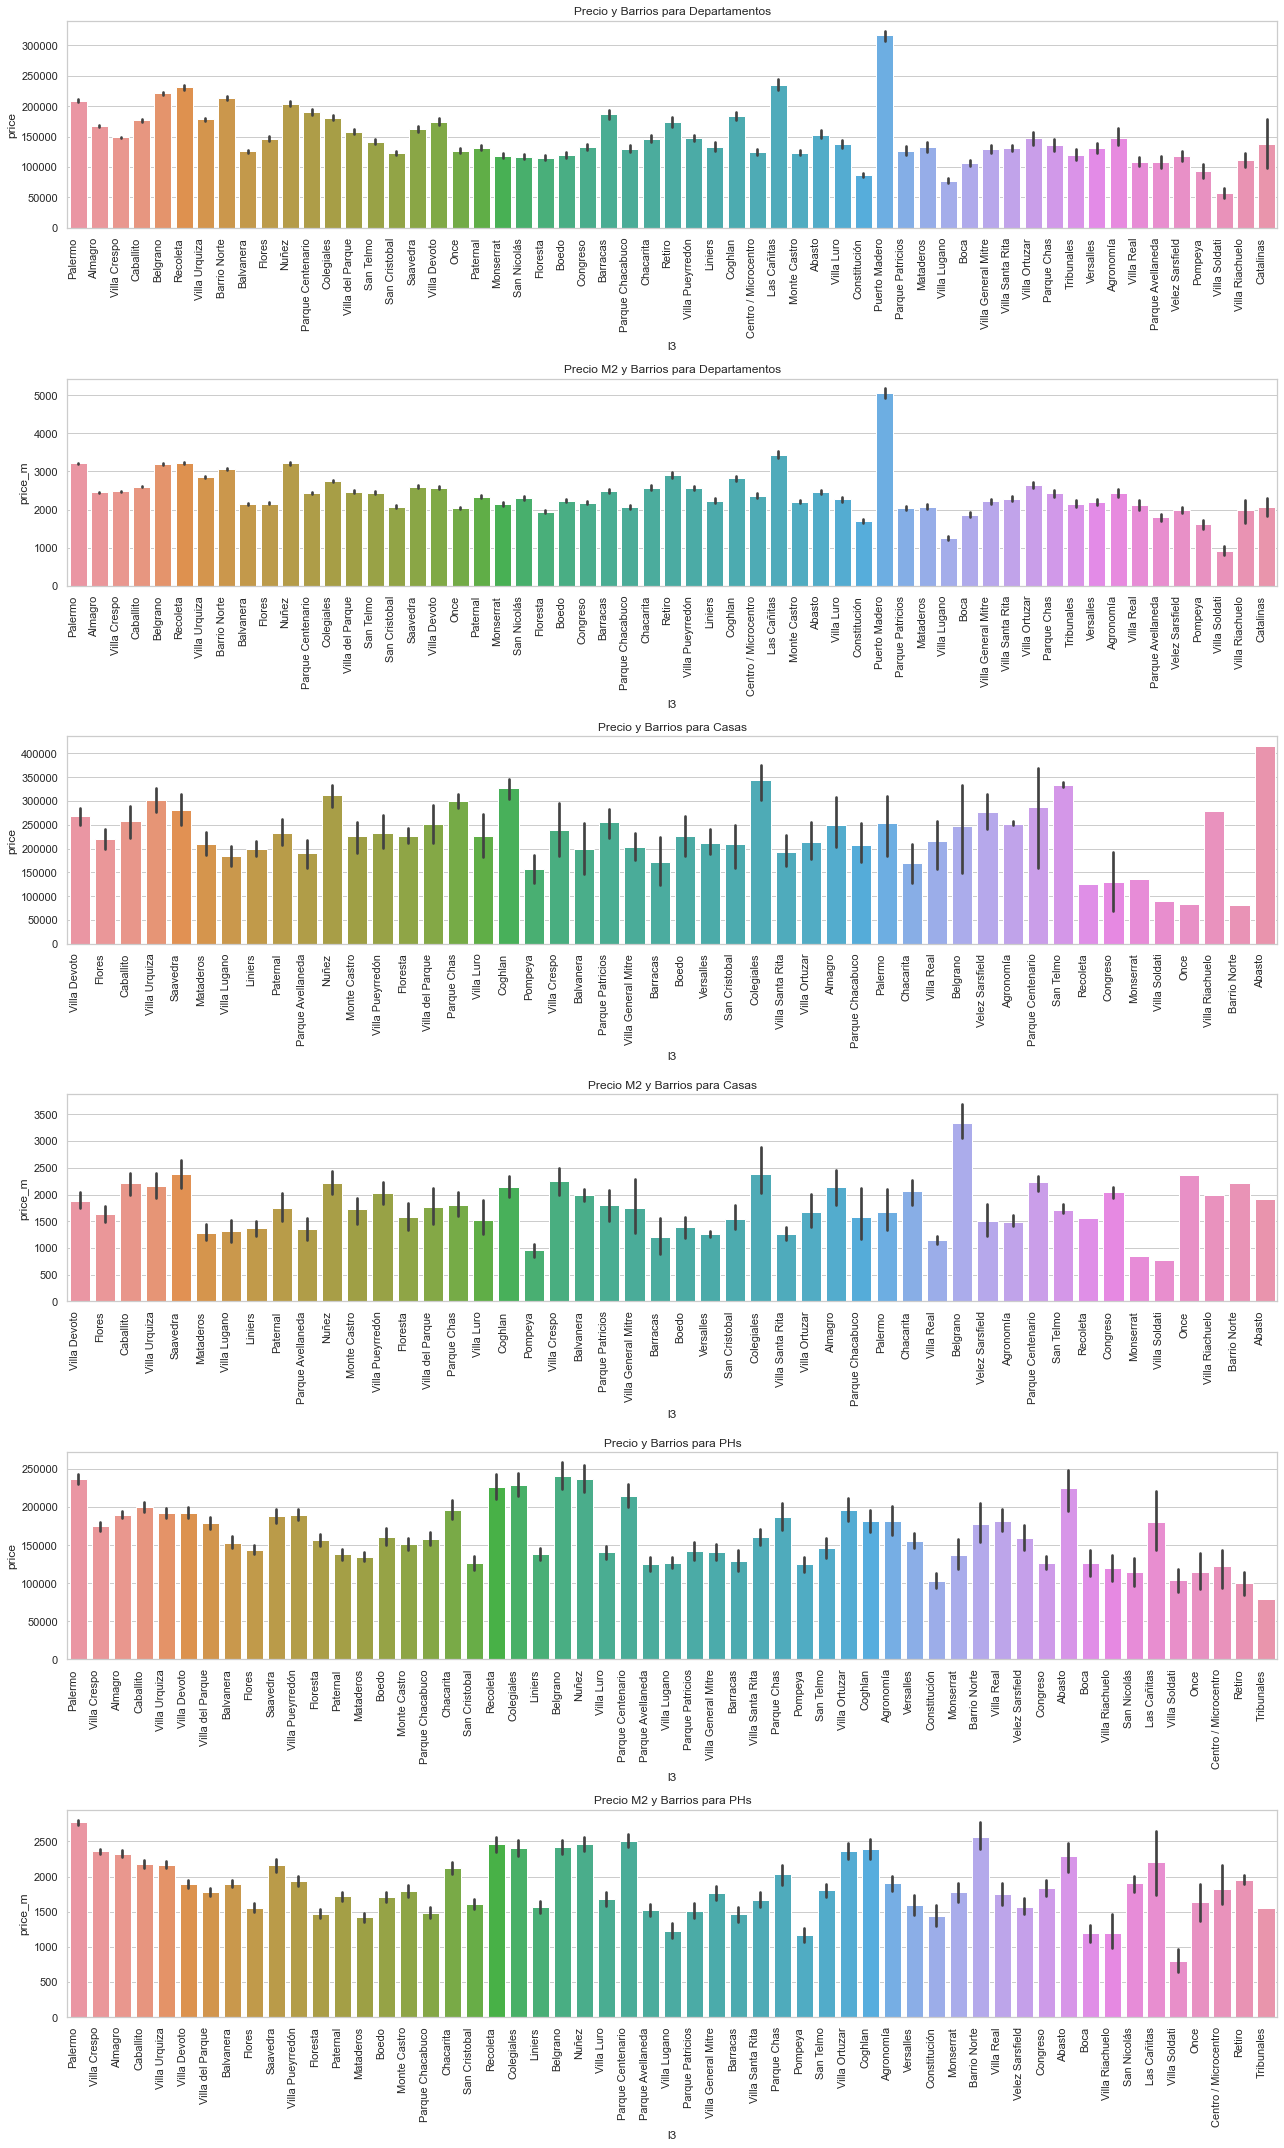

In [34]:
plt.figure(figsize=(9*2,30))
plt.subplot(6,1,1)
sns.set_theme(style="whitegrid")
sns.barplot(x="l3", y="price", data=df_d, order=df_d['l3'].value_counts().index)
plt.xticks(rotation = 90, ha = 'right')
plt.title('Precio y Barrios para Departamentos') 
plt.tight_layout()
plt.subplot(6,1,2)
sns.set_theme(style="whitegrid")
sns.barplot(x="l3", y="price_m", data=df_d, order=df_d['l3'].value_counts().index)
plt.xticks(rotation = 90, ha = 'right')
plt.title('Precio M2 y Barrios para Departamentos') 
plt.tight_layout()
plt.subplot(6,1,3)
sns.set_theme(style="whitegrid")
sns.barplot(x="l3", y="price", data=df_c, order= df_c['l3'].value_counts().index)
plt.xticks(rotation = 90, ha = 'right')
plt.title('Precio y Barrios para Casas') 
plt.tight_layout()
plt.subplot(6,1,4)
sns.set_theme(style="whitegrid")
sns.barplot(x="l3", y="price_m", data=df_c, order= df_c['l3'].value_counts().index)
plt.xticks(rotation = 90, ha = 'right')
plt.title('Precio M2 y Barrios para Casas') 
plt.tight_layout() 
plt.subplot(6,1,5)
sns.set_theme(style="whitegrid")
sns.barplot(x="l3", y="price", data=df_p, order= df_p['l3'].value_counts().index)
plt.xticks(rotation = 90, ha = 'right')
plt.title('Precio y Barrios para PHs') 
plt.tight_layout()
plt.subplot(6,1,6)
sns.set_theme(style="whitegrid")
sns.barplot(x="l3", y="price_m", data=df_p, order= df_p['l3'].value_counts().index)
plt.xticks(rotation = 90, ha = 'right')
plt.title('Precio M2 y Barrios para PHs') 
plt.tight_layout()



### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

***ML pensado desde la selección de datos del usuario***

El modelo permitirá que el usuario ingrese los valores, para que se pueda ajustar los datos de las variables independientes, ya que hay diferencias de precios importantes, según el barrio y el tipo de propiedad. La selección de todas las variables independientes permitirá que los errores de los tipos de propiedad como CASA y PH sean menores. Al mismo tiempo, la diferencia de precio entre precio entre barrios será mas ajustable sobre este dataset.

***Configuración del ML para el Benchmark***

Como el dataset se va reduciendo y se limpia los outliers con lo que el usuario plantea al hacer el análisis según el tipo de propiedad y barrio, me parece prudente utilizar tres modelos (Regresión Linear, Árboles y KNN) y después hacer mejoras en los hiperparametros que se plantea para obtener el menor RSME. De esta forma nos aseguramos que el modelo seleccionado siempre nos estará brindando, gracias a la optimización de hiperparametros, el mejor resultado según el dataset. 


In [47]:
#Pidiendo datos al usuario
tipo_de_propiedad = pyip.inputStr(prompt='Ingresa el tipo de propiedad: ')
barrio = pyip.inputStr(prompt='Ingresa el barrio: ')
superficie_total = pyip.inputNum(prompt='Ingresa a superficie total')
superficie_cubierta = pyip.inputNum(prompt='Ingresa la superficie cubierta: ')
cant_banos = pyip.inputInt(prompt='Ingresa cantidad de baños: ')
cant_cuartos = pyip.inputInt(prompt='Ingresa cantidad de cuartos: ')
cant_dormitorios = pyip.inputInt(prompt='Ingresa cantidad de dormitorios: ')

Ingresa el tipo de propiedad: 

 Departamento


Ingresa el barrio: 

 Palermo


Ingresa a superficie total

 100


Ingresa la superficie cubierta: 

 80


Ingresa cantidad de baños: 

 2


Ingresa cantidad de cuartos: 

 5


Ingresa cantidad de dormitorios: 

 4


In [48]:
#Filtramos el dataset sin outliers, con los datos ingresados por el usuario
df = df[(df['property_type'] == tipo_de_propiedad) & (df['l3'] == barrio) & (df['rooms'] <= cant_cuartos) & (df['bedrooms'] <= cant_dormitorios) & (df['bathrooms'] <= cant_banos) & (df['surface_total'] <= superficie_total) & (df['surface_covered'] <= superficie_cubierta)]

In [49]:
print(df.shape)

(6315, 9)


Dividimos el dataset en Train y Test. 

In [50]:
##Divido las variables independientes X con la independiente y, agregando los datos que van a estar dentro del entrenamiento con los datos que estan en el testing
X = df[['surface_total', 'surface_covered', 'rooms', 'bedrooms', 'bathrooms']]
y = df['price']
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

(6315, 5)
(6315,)
        surface_total  surface_covered  rooms  bedrooms  bathrooms
13577            28.0             28.0    2.0       1.0        1.0
61771            52.0             47.0    1.0       1.0        1.0
103437           82.0             68.0    3.0       2.0        1.0
130027           70.0             67.0    3.0       2.0        2.0
136565           50.0             42.0    1.0       1.0        1.0
...               ...              ...    ...       ...        ...
85150            51.0             37.0    2.0       1.0        1.0
106174           34.0             27.0    1.0       1.0        1.0
81370            73.0             63.0    3.0       2.0        1.0
132429           73.0             63.0    3.0       2.0        1.0
85391            59.0             54.0    2.0       1.0        1.0

[5052 rows x 5 columns]
        surface_total  surface_covered  rooms  bedrooms  bathrooms
49475            73.0             57.0    3.0       2.0        1.0
68139            39

***La selección de modelo de evaluación***

La selección de los modelos esta en la facilidad y la simplicidad de la ejecución de la mismas. Pero lo importante a recalcar es como evaluamos a cada modelo. Entendiendo que estamos trabajando con modelos de regresión, tenemos que entender y evaluar el error. Por este motivo utilizamos el Mean Square Error, que a diferencia del Mean Absolute Error que solo toma los valores absolutos para promediar, el primero son los valores al cuadrado y su media, para después calcular su raiz. Este valor nos va permitir después a futuro usar más eficientemente los calculos necesarios para obtener los gradientes.

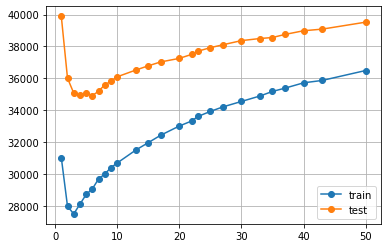

In [51]:
#Evaluación de Hiperparametros KNN
# Definimos las listas vacias para los valores de accuracy deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,13,15,17,20,22,23,25,27,30,33,35,37,40,43,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train) 
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)  
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.grid()
plt.legend()

In [52]:
#Imprimo los valores para encontrar el K que sería el ideal para un menor error de precio y variación entre TEST y TRAIN
print("Posicion")
print(k_vecinos[13])
print("Varianza de la Y")
print(lista_rmse_test[13]-lista_rmse_train[13])
print("Posicion")
print(k_vecinos[14])
print("Varianza de la Y")
print(lista_rmse_test[14]-lista_rmse_train[14])
print("Posicion")
print(k_vecinos[15])
print("Varianza de la Y")
print(lista_rmse_test[15]-lista_rmse_train[15])
print("Posicion")
print(k_vecinos[16])
print("Varianza de la Y")
print(lista_rmse_test[16]-lista_rmse_train[16])


Posicion
20
Varianza de la Y
4234.182691394148
Posicion
22
Varianza de la Y
4170.067172430412
Posicion
23
Varianza de la Y
4086.8834906052944
Posicion
25
Varianza de la Y
3991.8462346431916


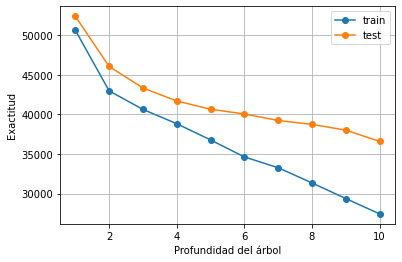

In [53]:
#Evaluación de Hiperparametros Decision Tree Regressor
# Definimos las listas vacias para los valores de RMSE deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train) 
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) 
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)  
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) 
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)
plt.plot(max_depths,lista_rmse_train,'o-',label='train' )
plt.plot(max_depths,lista_rmse_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')
plt.grid()

In [54]:
#Imprimo los valores para encontrar el grado de profundidad ideal para un menor error de precio y variación entre TEST y TRAIN
print("Posicion")
print(max_depths[4])
print("Varianza de la Y")
print(lista_rmse_test[4]-lista_rmse_train[4])
print("Posicion")
print(max_depths[5])
print("Varianza de la Y")
print(lista_rmse_test[5]-lista_rmse_train[5])
print("Posicion")
print(max_depths[6])
print("Varianza de la Y")
print(lista_rmse_test[6]-lista_rmse_train[6])
print("Posicion")
print(max_depths[7])
print("Varianza de la Y")
print(lista_rmse_test[7]-lista_rmse_train[7])
print("Posicion")
print(max_depths[8])
print("Varianza de la Y")
print(lista_rmse_test[8]-lista_rmse_train[8])
print("Posicion")
print(max_depths[9])
print("Varianza de la Y")
print(lista_rmse_test[9]-lista_rmse_train[9]) 

Posicion
5
Varianza de la Y
3878.6011672010063
Posicion
6
Varianza de la Y
5432.017768443686
Posicion
7
Varianza de la Y
5977.303587008813
Posicion
8
Varianza de la Y
7401.936362289096
Posicion
9
Varianza de la Y
8648.973824608805
Posicion
10
Varianza de la Y
9166.5588388639


In [55]:
#Ingreso los valores obtenidos del analisis anterior de los mejores hiperparametros para esta selección del usuario
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=25)

In [56]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=25)

In [57]:
#Obtención de la pendiente y la ordenada de origen del Modelo de Regresión Lineal
print(linear_model.coef_, linear_model.intercept_)

[  2067.26048322   1234.63738474  -1737.03008429 -13349.73427759
  37332.84936339] -14747.728440494771


***Modelos con los hiperparametros optimizados y análisis del RMSE***

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 41448.050953384045
Raíz del error cuadrático medio en Test: 43725.70631223204


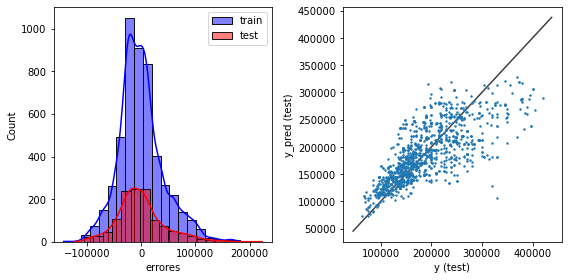

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 38835.455166193155
Raíz del error cuadrático medio en Test: 41708.28871226808


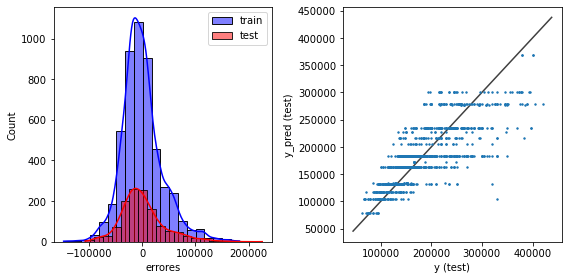

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 33933.49631143433
Raíz del error cuadrático medio en Test: 37925.342546077525


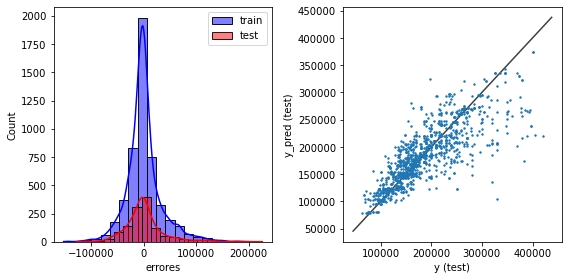

In [58]:
#Dejando los hiperparametros ajustados evaluo el mejor modelo para este caso
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.histplot(y_train - y_train_pred, bins = 20, label = 'train', kde = True, color='blue')
    sns.histplot(y_test - y_test_pred, bins = 20, label = 'test', kde = True, color='red')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

***¿Cual modelo a seleccionar?***

El modelo KNN a pesar de que se presentan mayores diferencias entre los valores obtenidos en la predicción de Train y Test, los errores son menores que las otras dos opciones. La dispersión de los datos no permite que el Modelo de Regresión Lineal sea el ideal para este tipo de datasets, ya que a pesar que el usuario pueda seleccionar el tipo de propiedad y el barrio, al no tener la variables como calidad de la propiedad y la antigüedad aún queda un margen importante sobre la discrecionalidad que tiene las propiedades cuando uno toma en cuenta variables como luminosidad. Respecto al modelo de Decisión de Árboles, aca se combina las características del modelo como el tipo de dataset que se presenta, por eso en la gráfica de distribución de errores uno puede observar el escalonamiento de los valores obtenidos. El KNN, al tomar en cuenta las características de los valores más cercanos, y como se ve en la optimización de hiperparametros, se toma valores altos, esto lleva a que los errores sean menores que los demás modelos. 

***Selección del modelo optimizado y la predicción del dato***

In [65]:
#Buscaremos obtener el valor del precio de la propiedad según los datos ingresados por el usuario
df.columns
val_pred = [ (cant_cuartos, cant_dormitorios, cant_banos, superficie_total, superficie_cubierta)]
X_val = pd.DataFrame(val_pred, columns=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'])
print(X_val)
print('')
print('Predicción de precio')
print(knn_regressor.predict(X_val))

   rooms  bedrooms  bathrooms  surface_total  surface_covered
0      5         4          2            100               80

Predicción de precio
[77796.]


***Conclusión***

El modelo a pesar que los precios predichos bajo el KNN y un error que no representa un gran diferencia para este tipo de propiedades, se puede seguir mejorando los resultados si tomamos en cuenta variables como antiguedad, el estado de la propiedad, la luminosidad y los amerities (para el caso de Departamentos, Casas y PHs). Estos son datos que ayudarían a reducir fuertemente el error para determinar mejor los precios de un tipo de inmueble como su localidad. 